# Code for Section 2.4 Volatility risk premium

In [1]:
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

# Download and preprocess data

In [2]:
data = yf.download(['^GSPC', '^VIX'], start='1998-12-22', end='2024-10-12')
snp_vix = data['Adj Close'].values

[*********************100%%**********************]  2 of 2 completed


# Create historical vs realized implied volatility graph (Figure 2.4.1)

In [7]:
daily_rets = np.diff(np.log(snp_vix[:, 0]))
realized_vols = np.full(len(daily_rets) - 21, np.nan)
for i in range(len(realized_vols)):
    realized_vols[i] = 100 * np.sqrt(252 * np.mean(daily_rets[i:i+21]**2))
real_vs_imp = realized_vols - snp_vix[:-22, 1]
real_vs_imp_avg = np.full(len(real_vs_imp), np.mean(real_vs_imp))
print(f'Historical equity risk premium is {np.round(real_vs_imp_avg[0], 2)}%.')

Historical equity risk premium is -3.64%.


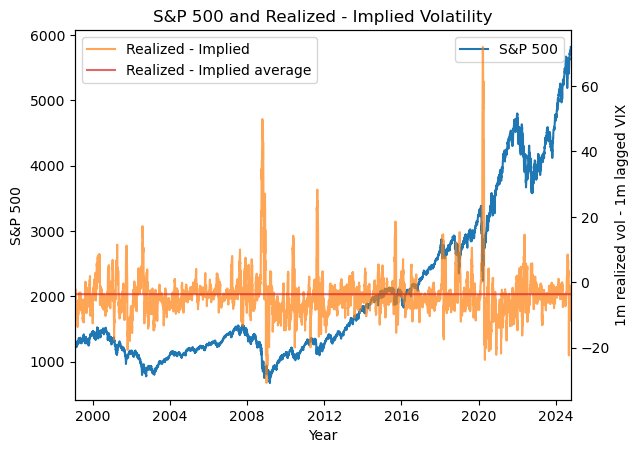

In [4]:
fig, ax1 = plt.subplots()
ax1.plot(data.index[22:], snp_vix[22:, 0])
ax1.set_ylabel('S&P 500')
ax1.set_xlabel('Year')
ax1.set_xlim([min(data.index[22:]), max(data.index[22:])])
plt.legend(['S&P 500'])
ax2 = ax1.twinx()
ax2.set_ylabel('1m realized vol - 1m lagged VIX')
ax2.plot(data.index[22:], real_vs_imp, color='tab:orange', alpha=0.7)
ax2.plot(data.index[22:], real_vs_imp_avg, color='tab:red', alpha=0.7)
plt.legend(['Realized - Implied', 'Realized - Implied average'])
plt.title('S&P 500 and Realized - Implied Volatility')
plt.show()